In [1]:
import pandas as pd

In [2]:
target06 = pd.read_csv("../data/processed/target06.csv")
target12 = pd.read_csv("../data/processed/target12.csv")
target24 = pd.read_csv("../data/processed/target24.csv")

### Pearson correlation coefficient
## $r_{XY} = \dfrac{cov(X,Y)}{\sigma_X \sigma_Y}$

In [3]:
target06.corr(method="pearson").drop(columns=["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure"])

,target
pm2_5,0.760448
month,-0.081213
weekday,-0.059408
hour,0.041729
wind-east,0.188281
wind-north,-0.120297
temperature,-0.318570
pressure,0.146662
target,1.000000


In [4]:
target12.corr(method="pearson").drop(columns=["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure"])

,target
pm2_5,0.627537
month,-0.082242
weekday,-0.046090
hour,0.038302
wind-east,0.162137
wind-north,-0.119463
temperature,-0.310214
pressure,0.165054
target,1.000000


In [5]:
target24.corr(method="pearson").drop(columns=["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure"])

,target
pm2_5,0.501434
month,-0.083247
weekday,-0.032376
hour,-0.008501
wind-east,0.147756
wind-north,-0.073093
temperature,-0.359690
pressure,0.176324
target,1.000000


### Mutual information
## $I(X;Y) = \sum_y \sum_x P_{(X,Y)} (x, y)  log \left( \dfrac{P_{(X,Y)} (x,y)}{P_X (x) P_Y (y)} \right)$
https://en.wikipedia.org/wiki/Mutual_information

In [6]:
from sklearn.feature_selection import mutual_info_regression

mutual_info_regression(target06[["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure"]], target06["target"], n_neighbors=3)
# Rows 0-7 from the column list above, column 0 = target

array([0.37734431, 0.15667775, 0.02592   , 0.00394057, 0.06725747,
       0.05320137, 0.13310551, 0.12648274])

In [7]:
mutual_info_regression(target12[["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure"]], target12["target"], n_neighbors=3)
# Rows 0-7 from the column list above, column 0 = target

array([0.22398659, 0.15973693, 0.02699646, 0.00456378, 0.04910646,
       0.01934093, 0.14270718, 0.11272218])

In [8]:
mutual_info_regression(target24[["pm2_5", "month", "weekday", "hour", "wind-east", "wind-north", "temperature", "pressure"]], target24["target"], n_neighbors=3)
# Rows 0-7 from the column list above, column 0 = target

array([0.17012835, 0.16175057, 0.01456215, 0.00473318, 0.05999991,
       0.03310017, 0.15322959, 0.13388621])

### Scatterplots

In [58]:
import matplotlib.pyplot as plt
font = {'family' : 'calibri',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

In [59]:
data06 = target06.to_numpy()
data12 = target12.to_numpy()
data24 = target24.to_numpy()

Text(0.5, 0, 'PM2,5 po 24 godzinach')

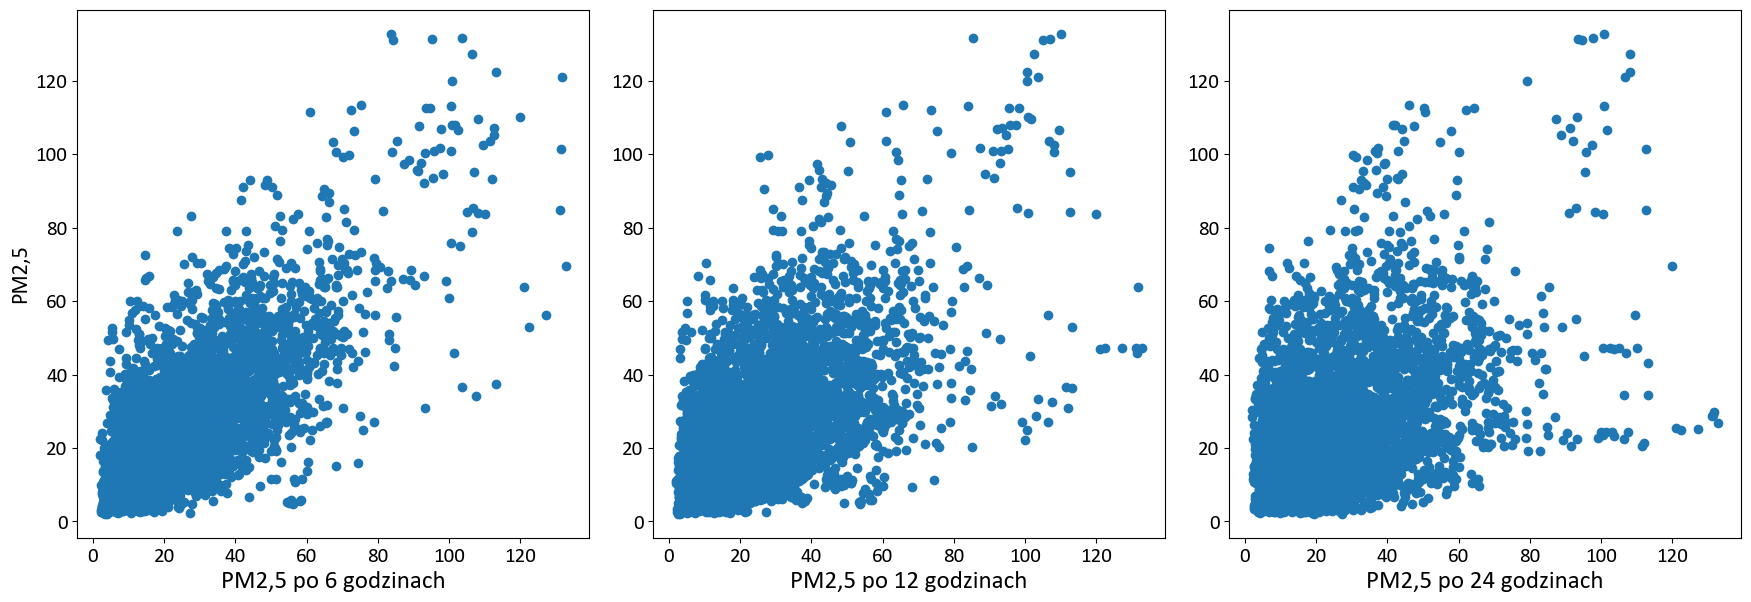

In [60]:
fig = plt.figure()
ax0 = fig.add_axes([0,0,0.8,1.1])
ax1 = fig.add_axes([0.9,0,0.8,1.1])
ax2 = fig.add_axes([1.8,0,0.8,1.1])
ax0.scatter(data06[:,8], data06[:,0])
ax0.set_ylabel('PM2,5', fontsize=16)
ax0.set_xlabel('PM2,5 po 6 godzinach', fontsize=18)
ax1.scatter(data12[:,8], data12[:,0])
ax1.set_xlabel('PM2,5 po 12 godzinach', fontsize=18)
ax2.scatter(data24[:,8], data24[:,0])
ax2.set_xlabel('PM2,5 po 24 godzinach', fontsize=18)

Text(0.5, 0, 'PM2,5')

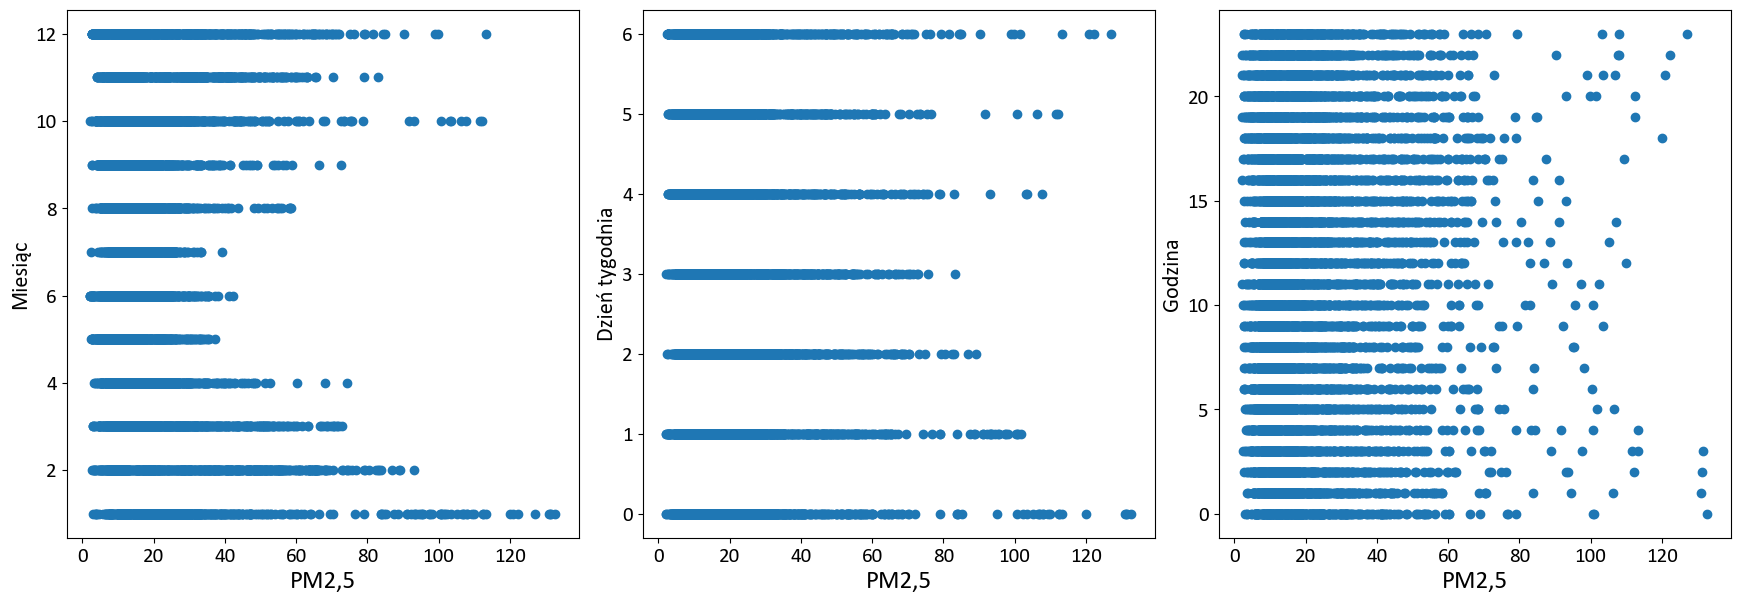

In [86]:
fig = plt.figure()
ax0 = fig.add_axes([0,0,0.8,1.1])
ax1 = fig.add_axes([0.9,0,0.8,1.1])
ax2 = fig.add_axes([1.8,0,0.8,1.1])
ax0.scatter(data06[:,8], data06[:,1])
ax0.set_ylabel('Miesiąc', fontsize=16)
ax0.set_xlabel('PM2,5', fontsize=18)
ax1.scatter(data06[:,8], data06[:,2])
ax1.set_ylabel('Dzień tygodnia', fontsize=16)
ax1.set_xlabel('PM2,5', fontsize=18)
ax2.scatter(data06[:,8], data06[:,3])
ax2.set_ylabel('Godzina', fontsize=16)
ax2.set_xlabel('PM2,5', fontsize=18)

### Violin plots

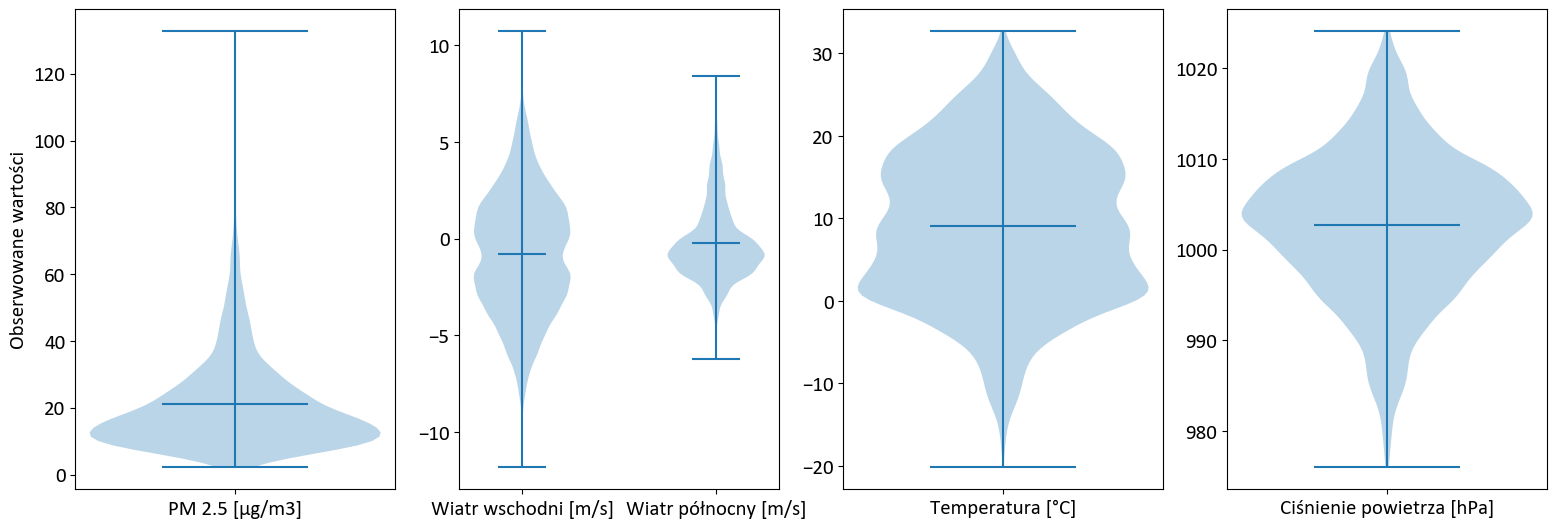

In [62]:
# Preparing violin plot
data_to_plot = target06.to_numpy()

fig = plt.figure()
ax0 = fig.add_axes([0,0,0.5,1])
ax1 = fig.add_axes([0.6,0,0.5,1])
ax2 = fig.add_axes([1.2,0,0.5,1])
ax3 = fig.add_axes([1.8,0,0.5,1])

ax0.violinplot([data_to_plot[:,0]], showmeans=True)
ax1.violinplot([data_to_plot[:,4], data_to_plot[:,5]], showmeans=True)
ax2.violinplot([data_to_plot[:,6]], showmeans=True)
ax3.violinplot([data_to_plot[:,7]], showmeans=True)
ax0.set_ylabel('Obserwowane wartości')
ax0.set_xticks([1], labels = ['PM 2.5 [µg/m3]'])
ax1.set_xticks([1, 2], labels = ['Wiatr wschodni [m/s]', 'Wiatr północny [m/s]'])
ax2.set_xticks([1], labels = ['Temperatura [°C]'])
ax3.set_xticks([1], labels = ['Ciśnienie powietrza [hPa]'])

plt.show()